In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv('cancer_data.csv')

In [4]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


In [5]:
df.describe()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,0.349927,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,0.477296,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,0.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [6]:
#corelation anaylsis
corr = df.corr()

In [7]:
corr.style.background_gradient(cmap='coolwarm')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
Class,1.000000,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448
age,0.714790,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957
menopause,0.820801,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755
tumor-size,0.821891,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258
inv-nodes,0.706294,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898
node-caps,0.690958,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583
deg-malig,0.822696,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210
breast,0.758228,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011
breast-quad,0.718677,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757
irradiat,0.423448,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='breast'>

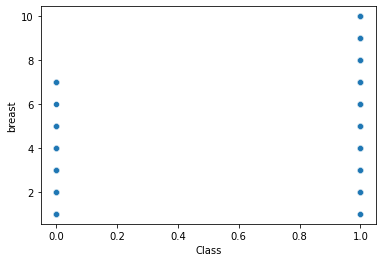

In [8]:
x = df["Class"]
y = df["breast"]
sns.scatterplot(x, y)

In [9]:
#pre-processing the data
endog = df['age']
exog = sm.add_constant(df[['breast']])
print(exog)

     const  breast
0      1.0       3
1      1.0       3
2      1.0       3
3      1.0       3
4      1.0       3
..     ...     ...
678    1.0       1
679    1.0       1
680    1.0       8
681    1.0      10
682    1.0      10

[683 rows x 2 columns]


In [10]:
#model building
#fit and summarize OLS model
mod = sm.OLS(endog, exog)
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     301.2
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           3.88e-56
Time:                        19:20:13   Log-Likelihood:                -1551.9
No. Observations:                 683   AIC:                             3108.
Df Residuals:                     681   BIC:                             3117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2455      0.155     14.461      0.0

In [11]:
#Residual Sum Error
def RSE(y_true, y_predicted):
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))
    
    rse = math.sqrt(RSS/(len(y_true) -2))
    return rse

In [12]:
rse = RSE(df['age'], results.predict())
print(rse)

2.3505379952192635


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='tumor-size'>

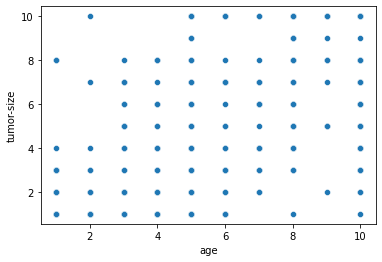

In [13]:
x1 = df["age"]
y1 = df["tumor-size"]
sns.scatterplot(x1, y1)

In [15]:
endog1 = df['irradiat']
exog1 = sm.add_constant(df[['age']])
print(exog)

     const  breast
0      1.0       3
1      1.0       3
2      1.0       3
3      1.0       3
4      1.0       3
..     ...     ...
678    1.0       1
679    1.0       1
680    1.0       8
681    1.0      10
682    1.0      10

[683 rows x 2 columns]
